In [2]:
import numpy as np

N = 100
D = 2

X = np.random.randn(N,D)
ones = np.ones((N, 1))

# ================= часть 1 ==========

# конкатенируйте в одной переменной X и ones 

In [3]:
X = np.concatenate((X, ones), axis=1)
X.shape

(100, 3)

# создайте случайный вектор весов w нужной размерности

In [4]:
w = np.random.randn(D + 1, 1)
w.shape

(3, 1)

# вычислите $z = w^Tx$

In [5]:
z = X @ w
z.shape

(100, 1)

# вычислите $\sigma(z)$ (предварительно реализуйте функцию sigmoid)

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# ================= часть 2 ==========

In [7]:

import numpy as np
N = 100
D = 2

# генерация датасета

np.random.seed(42)
X = np.random.randn(N, D)
ones = np.ones((N, 1))

X[:50,:] = X[:50,:] - 2*np.ones((50,D))
X[50:,:] = X[50:,:] + 2*np.ones((50,D))

# метки из train set
T = np.array([0]*50 + [1]*50)

# данные из части 1
ones = np.ones((N, 1))

Xb = np.concatenate((ones, X), axis=1)
w = np.random.randn(D + 1)
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

# реализуйте функцию: def cross_entropy(T, Y):

In [8]:
def cross_entropy(T, Y):
  return -1 * np.array([t * np.log(y) + (1 - t) * np.log(1 - y) for t, y in zip(T, Y)]).mean()

In [9]:
print(cross_entropy(T, Y))
...

0.060301620601623994


## задайте веса с помощью точного решения [0,-4,-4]

In [89]:
#отделяем данные по значению
X_0 = X[T == 0]
X_1 = X[T == 1]

#формируем Sigma как матрица ковариации, при этом обнуляя не диагональные элементы
Sigma = np.cov(X_0.T)
Sigma[1][0] = 0
Sigma[0][1] = 0

print('Sigma\n',Sigma)

mu_1 = np.array([X0.mean() for X0 in X_0.T])
mu_2 = np.array([X1.mean() for X1 in X_1.T])
Sigma_inv = np.linalg.inv(Sigma) #нахождения обратной матрицы Сигма согласно формуле 

print('Sigma inversed\n',Sigma_inv)

w = (mu_2 - mu_1) @ Sigma_inv
print('W',w)
alpha = len(X_0) / len(X)

b = 1/2 * mu_1.T @ Sigma_inv @ mu_1 - 1/2 * mu_2.T @ Sigma_inv @ mu_2 + np.log(alpha / (1 - alpha))

print('b',b)


Sigma
 [[0.69631545 0.        ]
 [0.         0.96798885]]
Sigma inversed
 [[1.43613072 0.        ]
 [0.         1.03306976]]
W [5.802288  4.3513719]
b 0.5224933024235856


# вычислите z и Y

In [90]:
z = X.dot(w) + b
Y = sigmoid(z)

# вычислите cross_entropy(T, Y)

In [91]:
cross_entropy(T, Y)

1.5288868989303075e-05

# ================ часть 3 ==============

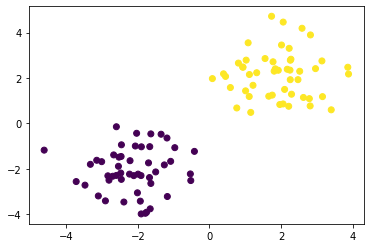

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=T)

# выполните 100 итераций градиентного спуска
### $J = crossentr + \frac{1}{2} \alpha w^Tw$

In [127]:
w = np.array([0, 4, 4])
loss = []
epochs = 300
lrate = 0.5
for epoch in range(epochs):
  prediction = sigmoid(Xb.dot(w.T))
  loss.append(cross_entropy(T, prediction))
  w = w - lrate * Xb.T @ (prediction - T)

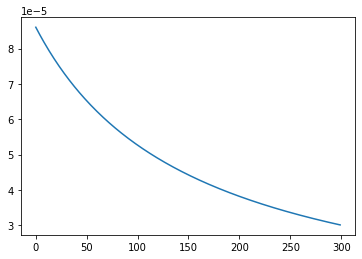

In [138]:
plt.plot(range(epochs), loss)


# выведите новые веса w
# нарисуйте датасет с границей (классификтором)

In [129]:
print('Weights: ', w)
print('Cross Entropy: ', cross_entropy(T, sigmoid(Xb.dot(w.T))))

Weights:  [0.1381924  4.63335528 4.5870253 ]
Cross Entropy:  3.0006246908541885e-05


# =========== часть 4 =============
# добавьте регуляризацию $L_2$

In [131]:
L2_loss = []
w = np.array([0, 4, 4])
epochs = 300
lrate = 0.5
r = 0.001
for epoch in range(epochs):
  prediction = sigmoid(Xb.dot(w.T))
  L2_term = 1/2 * r * w @ w.T / epochs
  L2_loss.append(cross_entropy(T, prediction) + L2_term)
  w = w - lrate * (Xb.T @ (prediction - T) + r * w**2 / epochs)
print('Weights: ', w)
print('Cross Entropy: ', cross_entropy(T, sigmoid(Xb.dot(w.T))))

Weights:  [0.13848833 4.62682173 4.58042507]
Cross Entropy:  3.0334982723024448e-05


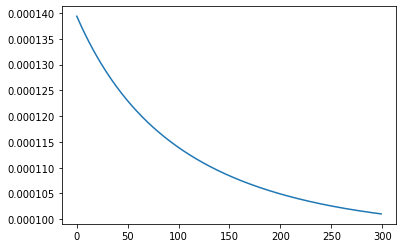

In [132]:
plt.plot(range(epochs), L2_loss)

# выведите новые веса w
# нарисуйте датасет с границей (классификтором)

w: [0.02814373 3.92416149 3.91519133]
b: 0.007188340611344133
x1: -1.0022911160747732
yy: [ 6.00655836  5.76109931  5.51564026  5.27018121  5.02472216  4.77926311
  4.53380406  4.28834501  4.04288597  3.79742692  3.55196787  3.30650882
  3.06104977  2.81559072  2.57013167  2.32467262  2.07921357  1.83375453
  1.58829548  1.34283643  1.09737738  0.85191833  0.60645928  0.36100023
  0.11554118 -0.12991787 -0.37537691 -0.62083596 -0.86629501 -1.11175406
 -1.35721311 -1.60267216 -1.84813121 -2.09359026 -2.3390493  -2.58450835
 -2.8299674  -3.07542645 -3.3208855  -3.56634455 -3.8118036  -4.05726265
 -4.3027217  -4.54818074 -4.79363979 -5.03909884 -5.28455789 -5.53001694
 -5.77547599 -6.02093504]


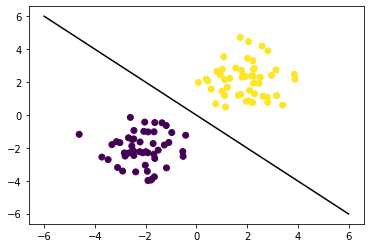

In [27]:
plt.scatter(X[:,0], X[:,1], c=T)

print('w:', w)
xx = np.linspace(-6, 6)
b = w[0]/w[2]
x1 = -w[1]/w[2]
yy = x1 * xx - b

print('b:', b)
print('x1:', x1)
print('yy:', yy)

plt.plot(xx, yy, 'k-')